<p style="font-size:36px;text-align:center"> <b>Intrusion Detection System using Machine Learning</b> </p>

<h1>Business Problem</h1>

<h2>Description</h2>

<p>Source:https://www.unb.ca/cic/datasets/nsl.html</p>
        
<h6> Problem statement : </h6>
<p>Given a network connection we should be able to classify it as one of the five classes of attack</p>

<h2>Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h2>Data</h2>

<h3>Data Overview</h3>

- Source: https://www.unb.ca/cic/datasets/nsl.html
- We have two data files: one conatins the train data and the test data 
- Both these data files are have a common columns
- <p> 
    Data file's information:
    <ul> 
        <li>
         Features:'duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
        'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
        'num_compromised' 'root_shell' 'su_attempted' 'num_root'
        'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
        'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
        'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
        'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
        'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
        'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
        'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
        'dst_host_srv_rerror_rate' 'attack_type' 
        </li>
    </ul>
</p>

<h2>Mapping the real-world problem to an ML problem</h2>

<h3>Type of Machine Learning Problem</h3>

<p>
    
            There are five different classes of attacksthat a network connection can be classified into => Multi class classification problem
   
      
    
</p>

<h3>Performance Metric</h3>

Metric(s): 
* Multi class log-loss 
* Confusion matrix 
* Precision
* Recall

<h3>Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the five classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>Train, CV and Test Datasets</h2>

Split the train file dataset randomly into two parts train, cross validation
and test file dataset as test data respectively

<h1>TYPES OF ATTACKS</h1>

* Denial of Service Attack (DOS): The legitimate
                                user of the service is denied the access or authority in
                                case of denial of service attack.
* Probe Attack:                   A program automatically scans a
                                open network of computers, services or a DNS server to
                                find valid IP addresses which are prone to attack.
* Remote to Local (R2L) Attack:   The attacker or the
                                program gains access to the local computer or a system
                                of the network and modifies the data.
* User to Root (U2R) Attack:      Attacker attacks a
                                local user on a machine and gains access which is able
                                to obtain privileges normally reserved for the super
                                (root) users. 

In [1]:
#Reference:Some of the code is refered from previous applied ai assignments.
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
import pandas as pd
df_rc_train=pd.read_csv(r'C:\Users\anjineyulu\df_rc_train_final.csv')
df_rc_test=pd.read_csv(r'C:\Users\anjineyulu\df_rc_test_final.csv')

In [34]:
df_rc_train.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.723589,0.185912,0.452201,0.008874,0.014994,0.945055,0.03406,0.093983,0.085104,0.005072
1,1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591588,0.015189,0.015611,0.435199,0.013792,0.945055,0.03406,0.093983,0.085104,0.005072
2,2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034896,0.772579,0.000562,0.252701,0.001067,0.000000,1.00000,0.000000,0.000000,0.000000
3,3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072
4,4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072


In [35]:
df_rc_train.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
count,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,62986.000000,0.006692,3.302024e-05,1.509928e-05,0.000198,0.007562,0.000037,0.002655,0.000244,0.395736,...,0.532657,0.372877,0.060167,0.107009,0.022998,0.592519,0.351093,0.063282,0.099047,0.008112
std,36365.417068,0.060700,4.253974e-03,3.069818e-03,0.014086,0.084510,0.004789,0.027922,0.009048,0.489010,...,0.430519,0.392037,0.148270,0.207933,0.046157,0.436291,0.428212,0.059524,0.153777,0.041422
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31493.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034896,0.058306,0.000000,0.000000,0.000000,0.000000,0.034060,0.000000,0.000000,0.000000
50%,62986.000000,0.000000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.723589,0.058306,0.003848,0.008874,0.004351,0.945055,0.034060,0.093983,0.085104,0.005072
75%,94479.000000,0.000000,2.000052e-07,3.939120e-07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.946854,0.772579,0.059784,0.108656,0.015066,0.945055,1.000000,0.093983,0.085104,0.005072
max,125972.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_rc_train.columns

Index(['Unnamed: 0', 'duration', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', '0', '1', '2', '3', '4',
       '0.1', '1.1', '2.1', '3.1', '4.1', '0.2', '1.2', '2.2', '3.2', '4.2'],
      dtype='object')

In [37]:
df_rc_train.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
df_y_train=df_rc_train['attack_type']

In [39]:
df_rc_train.drop('attack_type',axis=1,inplace=True)

In [40]:
df_rc_test.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
count,22543.000000,22543.000000,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,11271.000000,0.003792,1.654724e-04,0.001528,0.000311,0.002809,0.000237,0.001044,0.005412,0.442222,...,0.444728,0.333622,0.162373,0.139885,0.084209,0.667204,0.311579,0.607718,0.114082,0.018217
std,6507.747895,0.024382,7.525540e-03,0.015766,0.017619,0.047534,0.012158,0.009193,0.037583,0.496661,...,0.381507,0.278817,0.256449,0.235506,0.167549,0.464185,0.380073,0.364563,0.163459,0.044936
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5635.500000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.094202,0.159086,0.000000,0.000000,0.000000,0.010062,0.048264,0.128063,0.022135,0.012033
50%,11271.000000,0.000000,8.595216e-07,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.172427,0.159086,0.063564,0.018511,0.004555,1.000000,0.048264,0.866599,0.022135,0.013678
75%,16906.500000,0.000000,4.568198e-06,0.000447,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.882941,0.648850,0.146524,0.137018,0.063187,1.000000,0.802624,0.866599,0.135290,0.013678
max,22542.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df_rc_test.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
df_y_test=df_rc_test['attack_type']

In [43]:
df_rc_test.drop('attack_type',axis=1,inplace=True)

In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

In [ ]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [ ]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

In [ ]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [ ]:
# example data point after normalizing
print(X_train[0])

In [45]:
df_y_train.shape

(125973,)

In [46]:
df_y_train=pd.get_dummies(df_y_train)

In [49]:
df_y_test=pd.get_dummies(df_y_test)

In [17]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [22]:
df_rc_train.shape

(125973, 52)

In [18]:
# some model parameters

output_dim = 5
input_dim = df_rc_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [19]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               27136     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 93,445
Trainable params: 93,445
Non-trainable params: 0
_________________________________________________________________


In [50]:
print(df_rc_train.shape)
print(df_y_train.shape)

(125973, 52)
(125973, 5)


In [51]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(df_rc_train[:88181], df_y_train[:88181], batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(df_rc_train[88181:],df_y_train[88181:]))

Instructions for updating:
Use tf.cast instead.
Train on 88181 samples, validate on 37792 samples
Epoch 1/20
88181/88181 [==============================] - 4s 47us/step - loss: 0.9273 - acc: 0.5577 - val_loss: 0.8514 - val_acc: 0.5351
Epoch 2/20
88181/88181 [==============================] - 4s 47us/step - loss: 0.7428 - acc: 0.8252 - val_loss: 0.6209 - val_acc: 0.8595
Epoch 3/20
88181/88181 [==============================] - 5s 56us/step - loss: 0.5256 - acc: 0.8614 - val_loss: 0.4559 - val_acc: 0.8607
Epoch 4/20
88181/88181 [==============================] - 4s 44us/step - loss: 0.4188 - acc: 0.8646 - val_loss: 0.3886 - val_acc: 0.8652
Epoch 5/20
88181/88181 [==============================] - 4s 43us/step - loss: 0.3695 - acc: 0.8694 - val_loss: 0.3506 - val_acc: 0.8723
Epoch 6/20
88181/88181 [==============================] - 3s 36us/step - loss: 0.3386 - acc: 0.8752 - val_loss: 0.3251 - val_acc: 0.8783
Epoch 7/20
88181/88181 [==============================] - 3s 38us/step - loss: 0

Test score: 0.9502075334854475
Test accuracy: 0.7515858581430692


<IPython.core.display.Javascript object>


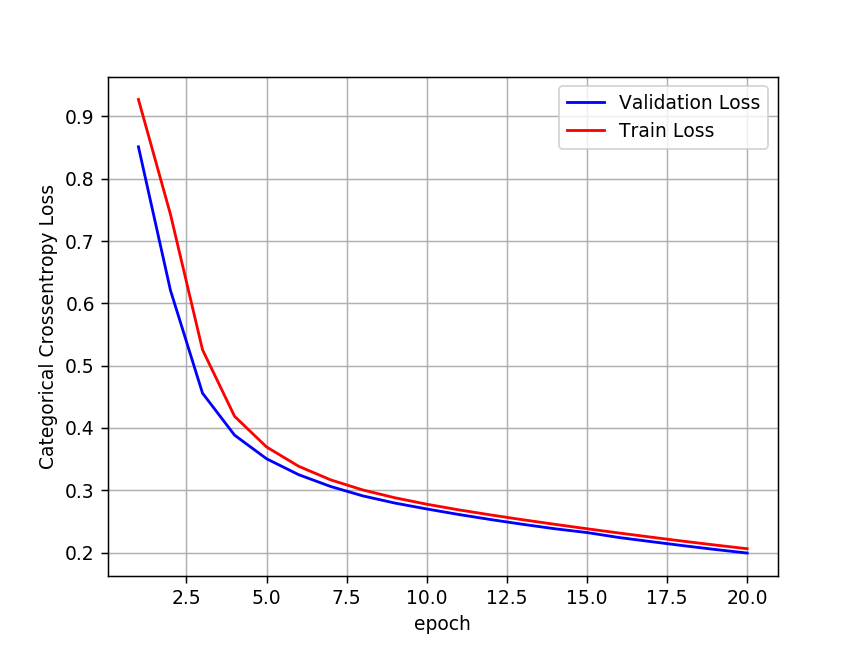

In [52]:
score = model_sigmoid.evaluate(df_rc_test,df_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


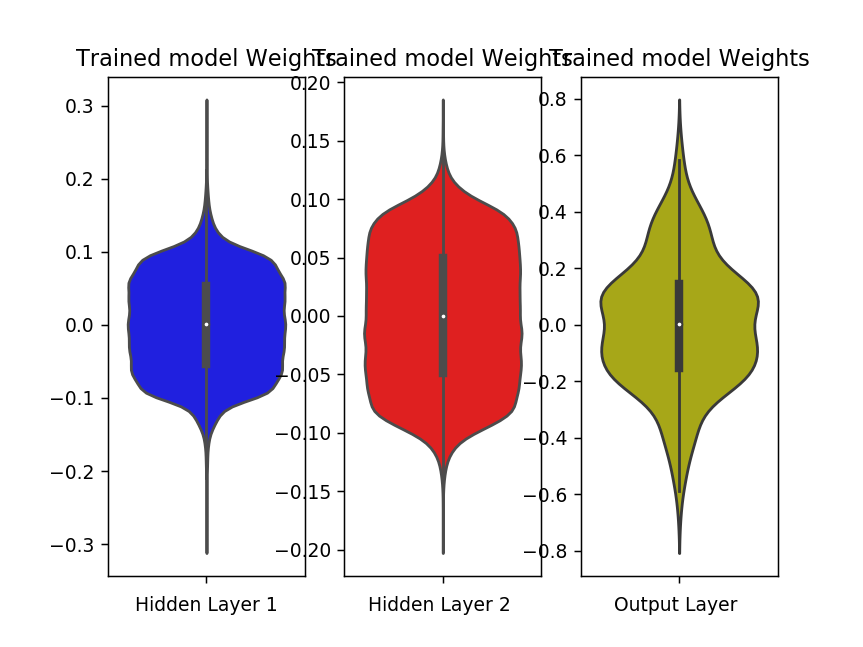

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [53]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [54]:
# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               27136     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 645       
Total params: 93,445
Trainable params: 93,445
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(df_rc_train[:88181], df_y_train[:88181], batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(df_rc_train[88181:],df_y_train[88181:]))

Train on 88181 samples, validate on 37792 samples
Epoch 1/20
88181/88181 [==============================] - 4s 47us/step - loss: 0.4006 - acc: 0.8909 - val_loss: 0.2283 - val_acc: 0.9469
Epoch 2/20
88181/88181 [==============================] - 4s 46us/step - loss: 0.1996 - acc: 0.9551 - val_loss: 0.1706 - val_acc: 0.9623
Epoch 3/20
88181/88181 [==============================] - 4s 48us/step - loss: 0.1594 - acc: 0.9648 - val_loss: 0.1425 - val_acc: 0.9687
Epoch 4/20
88181/88181 [==============================] - 4s 48us/step - loss: 0.1377 - acc: 0.9687 - val_loss: 0.1261 - val_acc: 0.9716
Epoch 5/20
88181/88181 [==============================] - 4s 49us/step - loss: 0.1241 - acc: 0.9708 - val_loss: 0.1150 - val_acc: 0.9724
Epoch 6/20
88181/88181 [==============================] - 4s 49us/step - loss: 0.1143 - acc: 0.9718 - val_loss: 0.1067 - val_acc: 0.9730
Epoch 7/20
88181/88181 [==============================] - 4s 41us/step - loss: 0.1067 - acc: 0.9723 - val_loss: 0.1001 - val_acc

Test score: 0.9018587999841375
Test accuracy: 0.7892915761042989


<IPython.core.display.Javascript object>


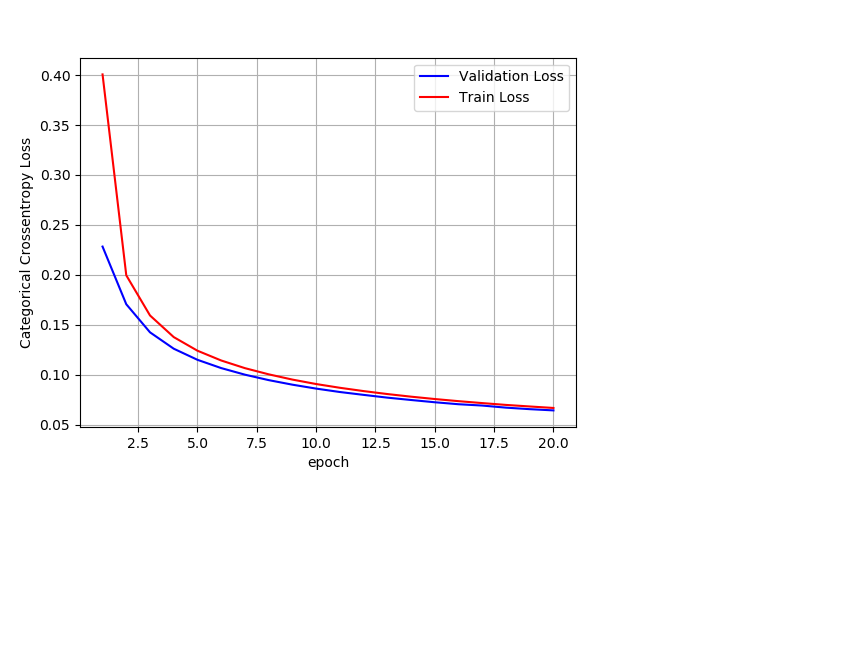

In [57]:
score = model_relu.evaluate(df_rc_test,df_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


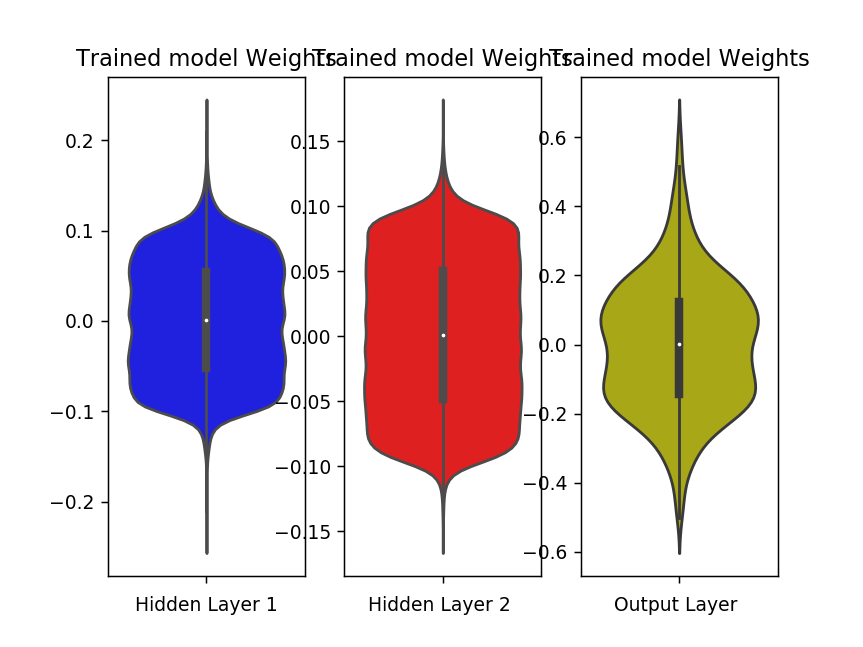

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [58]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Two hidden layers with 300 and 200 nuerons respectively with batch normalization

In [60]:
# Multilayer perceptron
from keras.layers.normalization import BatchNormalization
model_relu_1 = Sequential()
model_relu_1.add(Dense(300, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)))
model_relu_1.add(BatchNormalization())
model_relu_1.add(Dense(200, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_relu_1.add(BatchNormalization())
model_relu_1.add(Dense(output_dim, activation='softmax'))

model_relu_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               15900     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               60200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 1005      
Total params: 79,105
Trainable params: 78,105
Non-trainable params: 1,000
_________________________________________________________________


In [61]:
model_relu_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_1.fit(df_rc_train[:88181],df_y_train[:88181], batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(df_rc_train[88181:],df_y_train[88181:]))

Train on 88181 samples, validate on 37792 samples
Epoch 1/20
88181/88181 [==============================] - 6s 63us/step - loss: 0.0606 - acc: 0.9816 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 2/20
88181/88181 [==============================] - 4s 49us/step - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0257 - val_acc: 0.9917
Epoch 3/20
88181/88181 [==============================] - 5s 58us/step - loss: 0.0250 - acc: 0.9917 - val_loss: 0.0546 - val_acc: 0.9856
Epoch 4/20
88181/88181 [==============================] - 5s 58us/step - loss: 0.0201 - acc: 0.9931 - val_loss: 0.0206 - val_acc: 0.9931
Epoch 5/20
88181/88181 [==============================] - 5s 62us/step - loss: 0.0194 - acc: 0.9936 - val_loss: 0.0205 - val_acc: 0.9941
Epoch 6/20
88181/88181 [==============================] - 5s 58us/step - loss: 0.0176 - acc: 0.9941 - val_loss: 0.0265 - val_acc: 0.9913
Epoch 7/20
88181/88181 [==============================] - 5s 59us/step - loss: 0.0169 - acc: 0.9941 - val_loss: 0.0154 - val_acc

Test score: 1.9237465401383886
Test accuracy: 0.7662245486456642


<IPython.core.display.Javascript object>


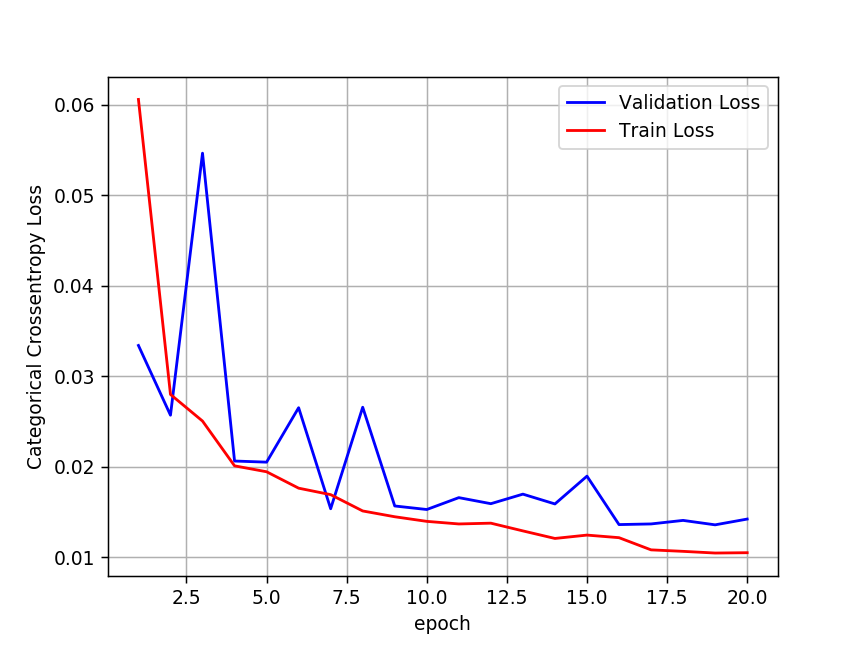

In [62]:
score = model_relu_1.evaluate(df_rc_test,df_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


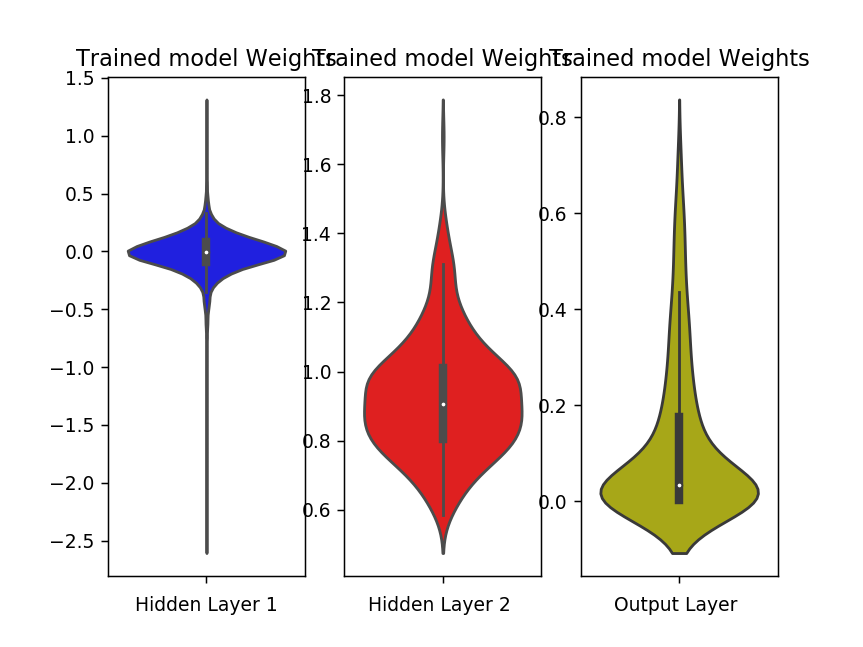

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [63]:
w_after = model_relu_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Two hidden layers with 300 and 200 nuerons respectively with dropouts

In [70]:
# Multilayer perceptron
from keras.layers import Dropout
model_relu_2 = Sequential()
model_relu_2.add(Dense(300, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)))
model_relu_2.add(Dropout(0.5))
model_relu_2.add(Dense(200, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.01, seed=None)))
model_relu_2.add(Dropout(0.5))
model_relu_2.add(Dense(output_dim, activation='softmax'))

model_relu_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 300)               15900     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 1005      
Total params: 77,105
Trainable params: 77,105
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_relu_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_2.fit(df_rc_train[:88181],df_y_train[:88181], batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(df_rc_train[88181:],df_y_train[88181:]))

Train on 88181 samples, validate on 37792 samples
Epoch 1/20
88181/88181 [==============================] - 6s 65us/step - loss: 0.1125 - acc: 0.9688 - val_loss: 0.0526 - val_acc: 0.9795
Epoch 2/20
88181/88181 [==============================] - 4s 51us/step - loss: 0.0549 - acc: 0.9812 - val_loss: 0.0381 - val_acc: 0.9870
Epoch 3/20
88181/88181 [==============================] - 5s 52us/step - loss: 0.0436 - acc: 0.9844 - val_loss: 0.0330 - val_acc: 0.9881
Epoch 4/20
88181/88181 [==============================] - 5s 54us/step - loss: 0.0361 - acc: 0.9873 - val_loss: 0.0271 - val_acc: 0.9916
Epoch 5/20
88181/88181 [==============================] - 5s 55us/step - loss: 0.0319 - acc: 0.9892 - val_loss: 0.0233 - val_acc: 0.9923
Epoch 6/20
88181/88181 [==============================] - 5s 55us/step - loss: 0.0288 - acc: 0.9900 - val_loss: 0.0221 - val_acc: 0.9927
Epoch 7/20
88181/88181 [==============================] - 5s 54us/step - loss: 0.0267 - acc: 0.9910 - val_loss: 0.0207 - val_acc

Test score: 1.7811025318926823
Test accuracy: 0.7677327773641135


<IPython.core.display.Javascript object>


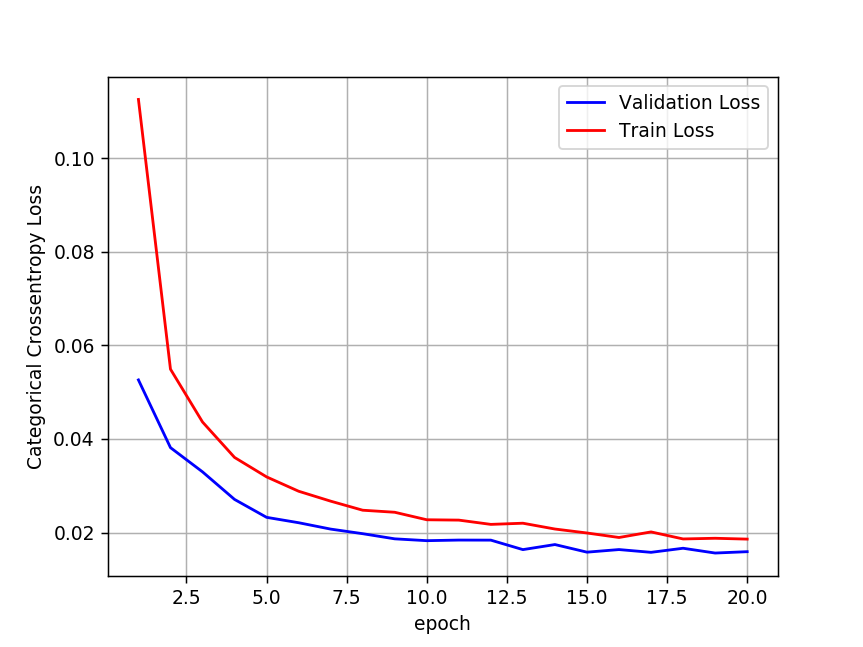

In [72]:
score = model_relu_2.evaluate(df_rc_test,df_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


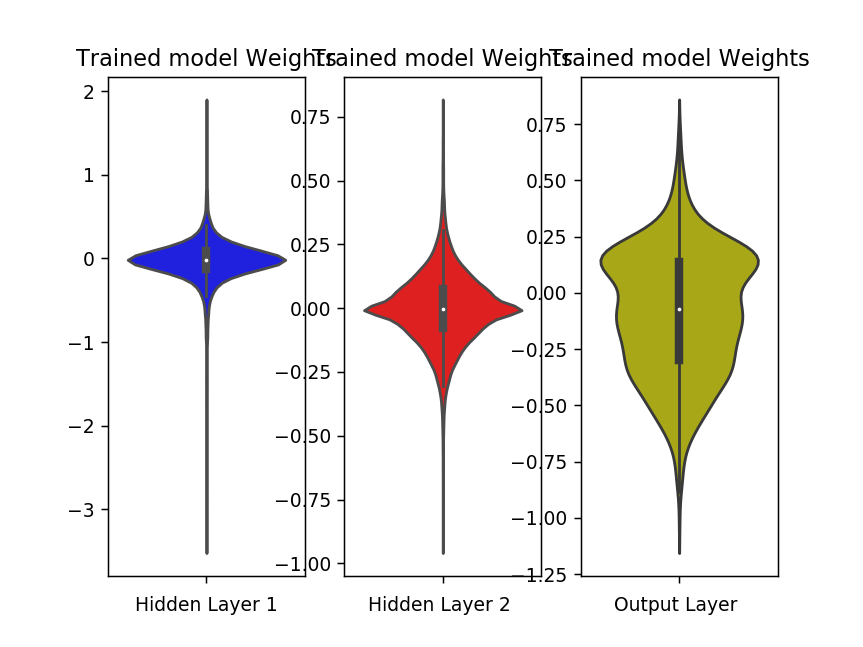

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [73]:
w_after = model_relu_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Three hidden layers with 300,200,100 nuerons respectively with dropouts

In [75]:
# Multilayer perceptron

model_relu_3 = Sequential()
model_relu_3.add(Dense(300, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(Dense(200, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(Dense(100, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(Dense(output_dim, activation='softmax'))

model_relu_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 300)               15900     
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 505       
Total para

In [76]:
model_relu_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_3.fit(df_rc_train[:88181],df_y_train[:88181], batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(df_rc_train[88181:],df_y_train[88181:]))

Train on 88181 samples, validate on 37792 samples
Epoch 1/20
88181/88181 [==============================] - 7s 75us/step - loss: 0.1647 - acc: 0.9536 - val_loss: 0.0581 - val_acc: 0.9796
Epoch 2/20
88181/88181 [==============================] - 6s 71us/step - loss: 0.0688 - acc: 0.9780 - val_loss: 0.0429 - val_acc: 0.9852
Epoch 3/20
88181/88181 [==============================] - 6s 70us/step - loss: 0.0515 - acc: 0.9825 - val_loss: 0.0347 - val_acc: 0.9882
Epoch 4/20
88181/88181 [==============================] - 6s 69us/step - loss: 0.0436 - acc: 0.9851 - val_loss: 0.0287 - val_acc: 0.9901
Epoch 5/20
88181/88181 [==============================] - 6s 67us/step - loss: 0.0390 - acc: 0.9869 - val_loss: 0.0335 - val_acc: 0.9896
Epoch 6/20
88181/88181 [==============================] - 6s 67us/step - loss: 0.0349 - acc: 0.9882 - val_loss: 0.0240 - val_acc: 0.9921
Epoch 7/20
88181/88181 [==============================] - 6s 69us/step - loss: 0.0326 - acc: 0.9888 - val_loss: 0.0226 - val_acc

Test score: 1.9586146036705414
Test accuracy: 0.7633411702133349


<IPython.core.display.Javascript object>


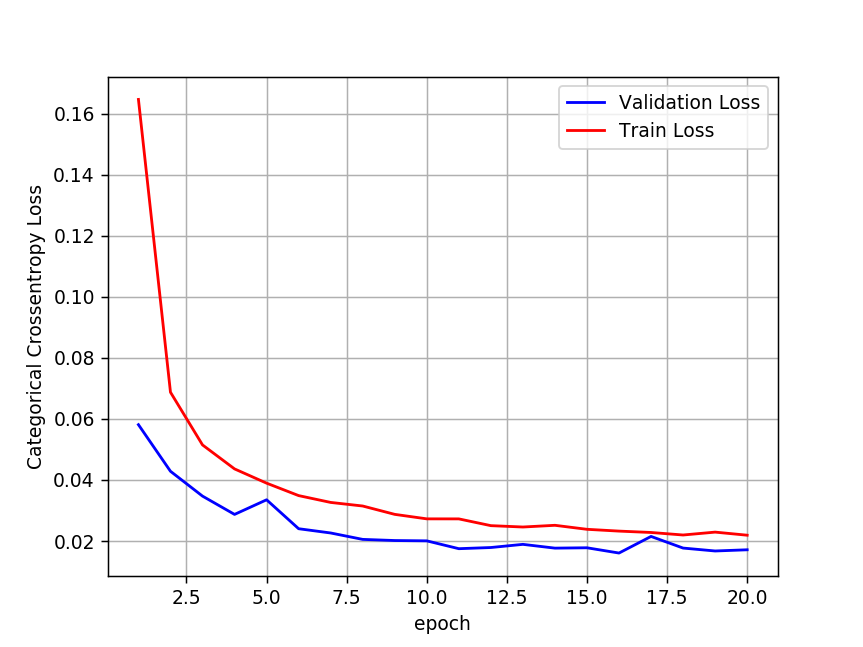

In [77]:
score = model_relu_3.evaluate(df_rc_test,df_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


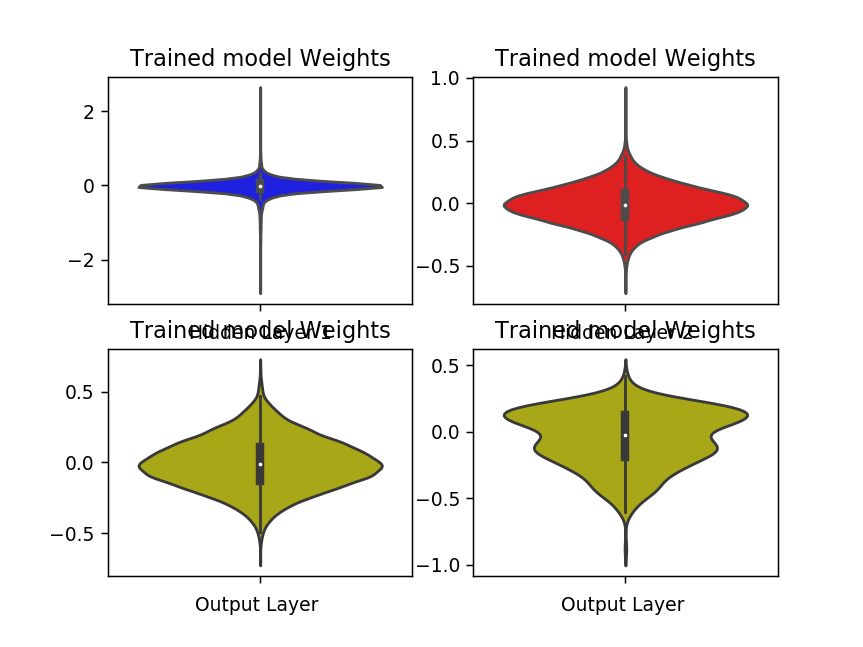

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [79]:
w_after = model_relu_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Output Layer ')
plt.show()
plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Three hidden layers with 300,200,100 nuerons respectively with batch normalization

In [80]:
# Multilayer perceptron

model_relu_4 = Sequential()
model_relu_4.add(Dense(300, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)))
model_relu_4.add(BatchNormalization())
model_relu_4.add(Dense(200, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_relu_1.add(BatchNormalization())
model_relu_4.add(Dense(100, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)))
model_relu_4.add(BatchNormalization())
model_relu_4.add(Dense(output_dim, activation='softmax'))

model_relu_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 300)               15900     
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_23 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 505       
Total params: 98,305
Trainable params: 97,505
Non-trainable params: 800
_________________________________________________________________


In [81]:
model_relu_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_4.fit(df_rc_train[:88181],df_y_train[:88181], batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(df_rc_train[88181:],df_y_train[88181:]))

Train on 88181 samples, validate on 37792 samples
Epoch 1/20
88181/88181 [==============================] - 7s 80us/step - loss: 0.0599 - acc: 0.9823 - val_loss: 0.0341 - val_acc: 0.9881
Epoch 2/20
88181/88181 [==============================] - 6s 67us/step - loss: 0.0296 - acc: 0.9897 - val_loss: 0.0239 - val_acc: 0.9912
Epoch 3/20
88181/88181 [==============================] - 6s 67us/step - loss: 0.0242 - acc: 0.9919 - val_loss: 0.0388 - val_acc: 0.9882
Epoch 4/20
88181/88181 [==============================] - 6s 72us/step - loss: 0.0223 - acc: 0.9922 - val_loss: 0.0243 - val_acc: 0.9926
Epoch 5/20
88181/88181 [==============================] - 7s 80us/step - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0183 - val_acc: 0.9941
Epoch 6/20
88181/88181 [==============================] - 7s 79us/step - loss: 0.0181 - acc: 0.9936 - val_loss: 0.0242 - val_acc: 0.9923
Epoch 7/20
88181/88181 [==============================] - 6s 68us/step - loss: 0.0177 - acc: 0.9940 - val_loss: 0.0195 - val_acc

Test score: 1.8978218538327623
Test accuracy: 0.7639622055679904


<IPython.core.display.Javascript object>


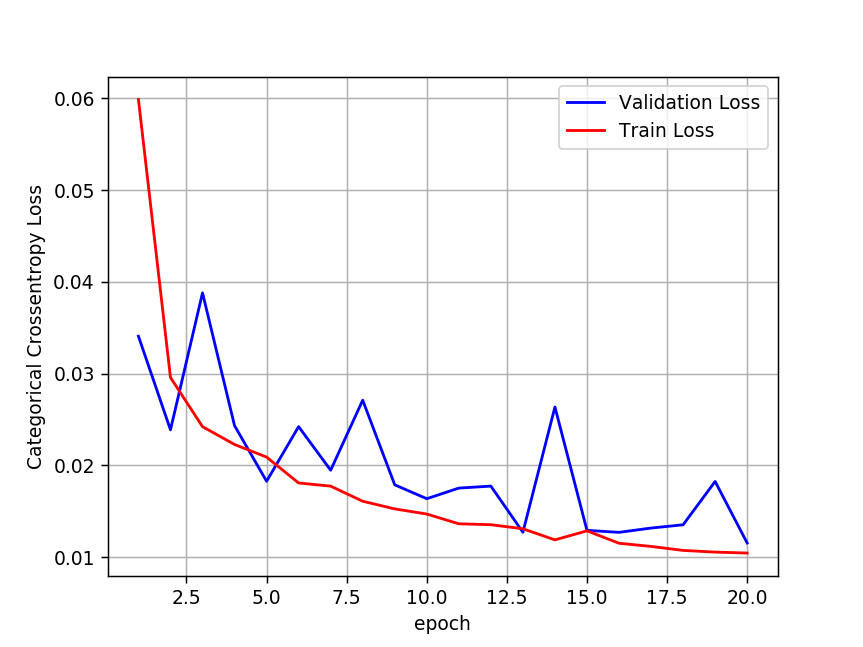

In [82]:
score = model_relu_4.evaluate(df_rc_test,df_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


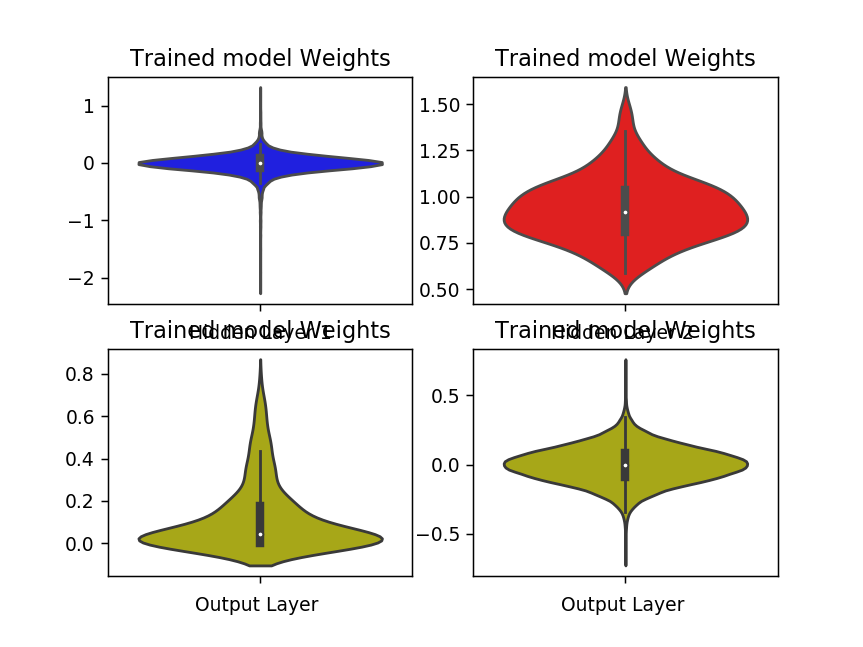

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [83]:
w_after = model_relu_4.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Output Layer ')
plt.show()
plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Five hidden layers with 500,400,300,200,100 nuerons respectively with batch normalization

In [84]:
# Multilayer perceptron

model_relu_5 = Sequential()
model_relu_5.add(Dense(500, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dense(400, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.0707, seed=None)))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dense(300, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dense(200, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dense(100, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dense(output_dim, activation='softmax'))

model_relu_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               26500     
_________________________________________________________________
batch_normalization_6 (Batch (None, 500)               2000      
_________________________________________________________________
dense_27 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dense_28 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_8 (Batch (None, 300)               1200      
_________________________________________________________________
dense_29 (Dense)             (None, 200)               60200     
__________

In [85]:
model_relu_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_4.fit(df_rc_train[:88181],df_y_train[:88181], batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(df_rc_train[88181:],df_y_train[88181:]))

Train on 88181 samples, validate on 37792 samples
Epoch 1/20
88181/88181 [==============================] - 8s 90us/step - loss: 0.0098 - acc: 0.9965 - val_loss: 0.0139 - val_acc: 0.9955
Epoch 2/20
88181/88181 [==============================] - 7s 76us/step - loss: 0.0104 - acc: 0.9961 - val_loss: 0.0160 - val_acc: 0.9954
Epoch 3/20
88181/88181 [==============================] - 6s 73us/step - loss: 0.0102 - acc: 0.9963 - val_loss: 0.0135 - val_acc: 0.9962
Epoch 4/20
88181/88181 [==============================] - 6s 71us/step - loss: 0.0095 - acc: 0.9965 - val_loss: 0.0132 - val_acc: 0.9958
Epoch 5/20
88181/88181 [==============================] - 6s 72us/step - loss: 0.0087 - acc: 0.9968 - val_loss: 0.0120 - val_acc: 0.9963
Epoch 6/20
88181/88181 [==============================] - 6s 71us/step - loss: 0.0098 - acc: 0.9964 - val_loss: 0.0118 - val_acc: 0.9968
Epoch 7/20
88181/88181 [==============================] - 7s 79us/step - loss: 0.0090 - acc: 0.9965 - val_loss: 0.0148 - val_acc

Test score: 2.0030136724248764
Test accuracy: 0.02741427494122344


<IPython.core.display.Javascript object>


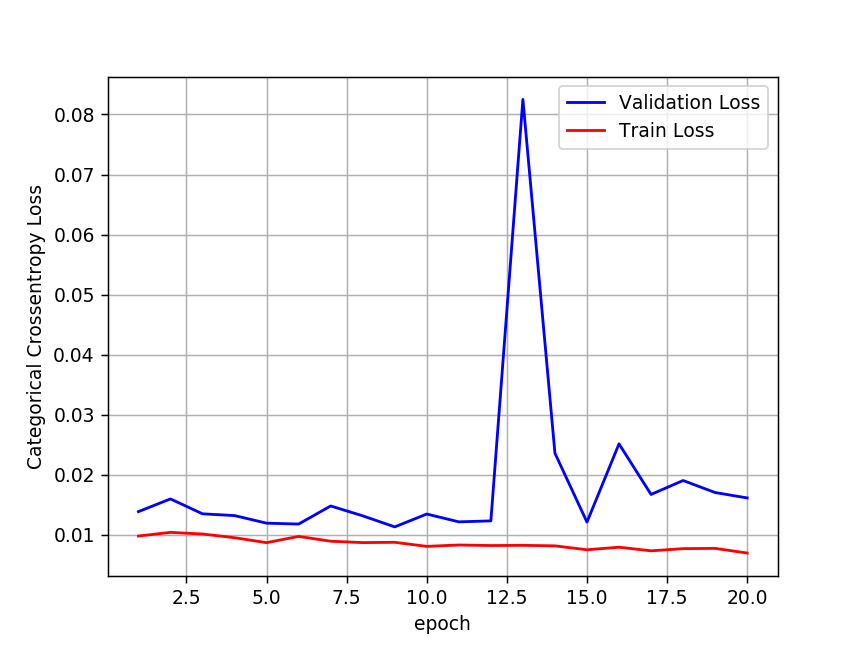

In [86]:
score = model_relu_5.evaluate(df_rc_test,df_y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


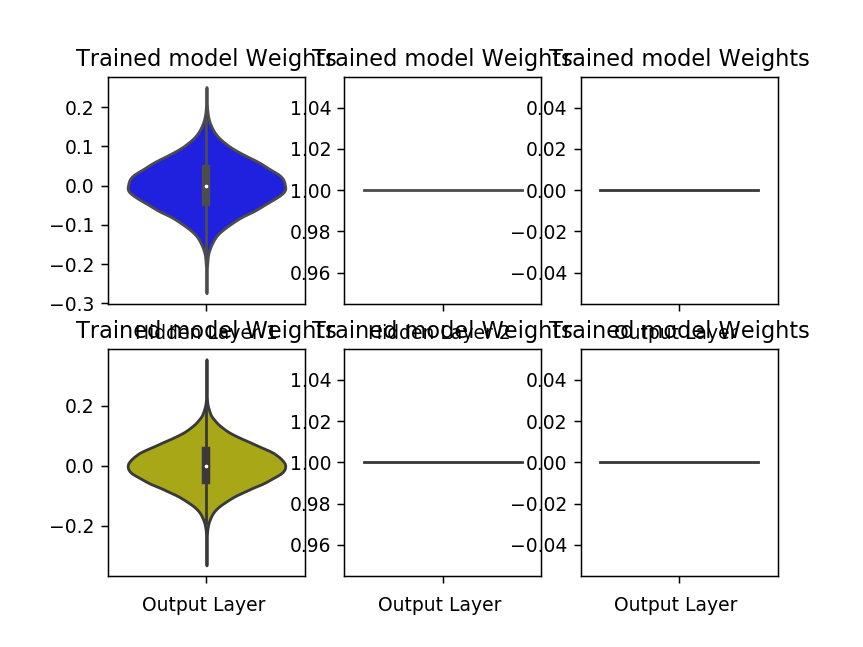

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [87]:
w_after = model_relu_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()